In [18]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [19]:
#data import
game_data = pd.read_csv('data/clean_data.csv')

In [20]:
tagg_price = pd.DataFrame(game_data[["AppID", "Name", "Price", "Tags"]])

In [21]:
#generate table of genres

json_table = []
tag_price_json = tagg_price.to_json(orient='records')
tag_price_json = json.loads(tag_price_json)

for j in tag_price_json:
    test = {}
    tags = j["Tags"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if tags != None:
        tags = tags.split(",")
        for i in tags:
            test[i] = True
    
    json_table.append(test)

print(len(json_table))

16081


In [22]:
tag_price_table = pd.DataFrame(json_table)
print(tag_price_table.shape)
print(tag_price_table.columns.tolist())
tag_price_table.fillna(value=False, inplace=True)

tag_price_table.head()

(16081, 439)
['AppID', 'Name', 'Price', 'Turn-Based Combat', 'Massively Multiplayer', 'Multiplayer', 'RPG', 'Tactical RPG', 'Exploration', 'PvP', 'MMORPG', 'Turn-Based Strategy', 'God Game', 'Strategy', '2.5D', 'Magic', 'Medieval', 'Mythology', 'Class-Based', 'Turn-Based Tactics', 'Singleplayer', 'Online Co-Op', 'Co-op', 'Action', 'Indie', 'Adventure', 'Puzzle-Platformer', 'Arcade', 'Zombies', 'Wargame', 'Historical', 'Strategy RPG', 'Perma Death', 'Difficult', '2D', 'Rogue-lite', 'Party-Based RPG', 'Comic Book', 'Team-Based', 'Female Protagonist', 'Hand-drawn', 'Stylized', 'World War II', 'Card Game', 'Deckbuilding', 'Lovecraftian', 'Board Game', 'Free to Play', 'Action Roguelike', 'RPGMaker', 'Mystery', 'Fantasy', 'Rogue-like', 'Dungeon Crawler', 'Pixel Graphics', 'Early Access', 'Top-Down', 'Top-Down Shooter', 'Procedural Generation', 'Shooter', 'Sci-fi', 'Aliens', 'Third Person', 'Isometric', 'Twin Stick Shooter', 'Horror', 'Casual', 'Point & Click', 'Hidden Object', 'Pirates', 'Re

,AppID,Name,Price,Turn-Based Combat,Massively Multiplayer,Multiplayer,RPG,Tactical RPG,Exploration,PvP,...,Steam Machine,Photo Editing,Reboot,Software Training,Instrumental Music,BMX,Video Production,Web Publishing,Batman,8-bit Music
0,1469160,Wartune Reborn,0.00,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,320150,Deadlings: Rotten Edition,3.99,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1026420,WARSAW,23.99,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,485000,Cthulhu Realms,0.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1454010,Diary of Lucie,12.99,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


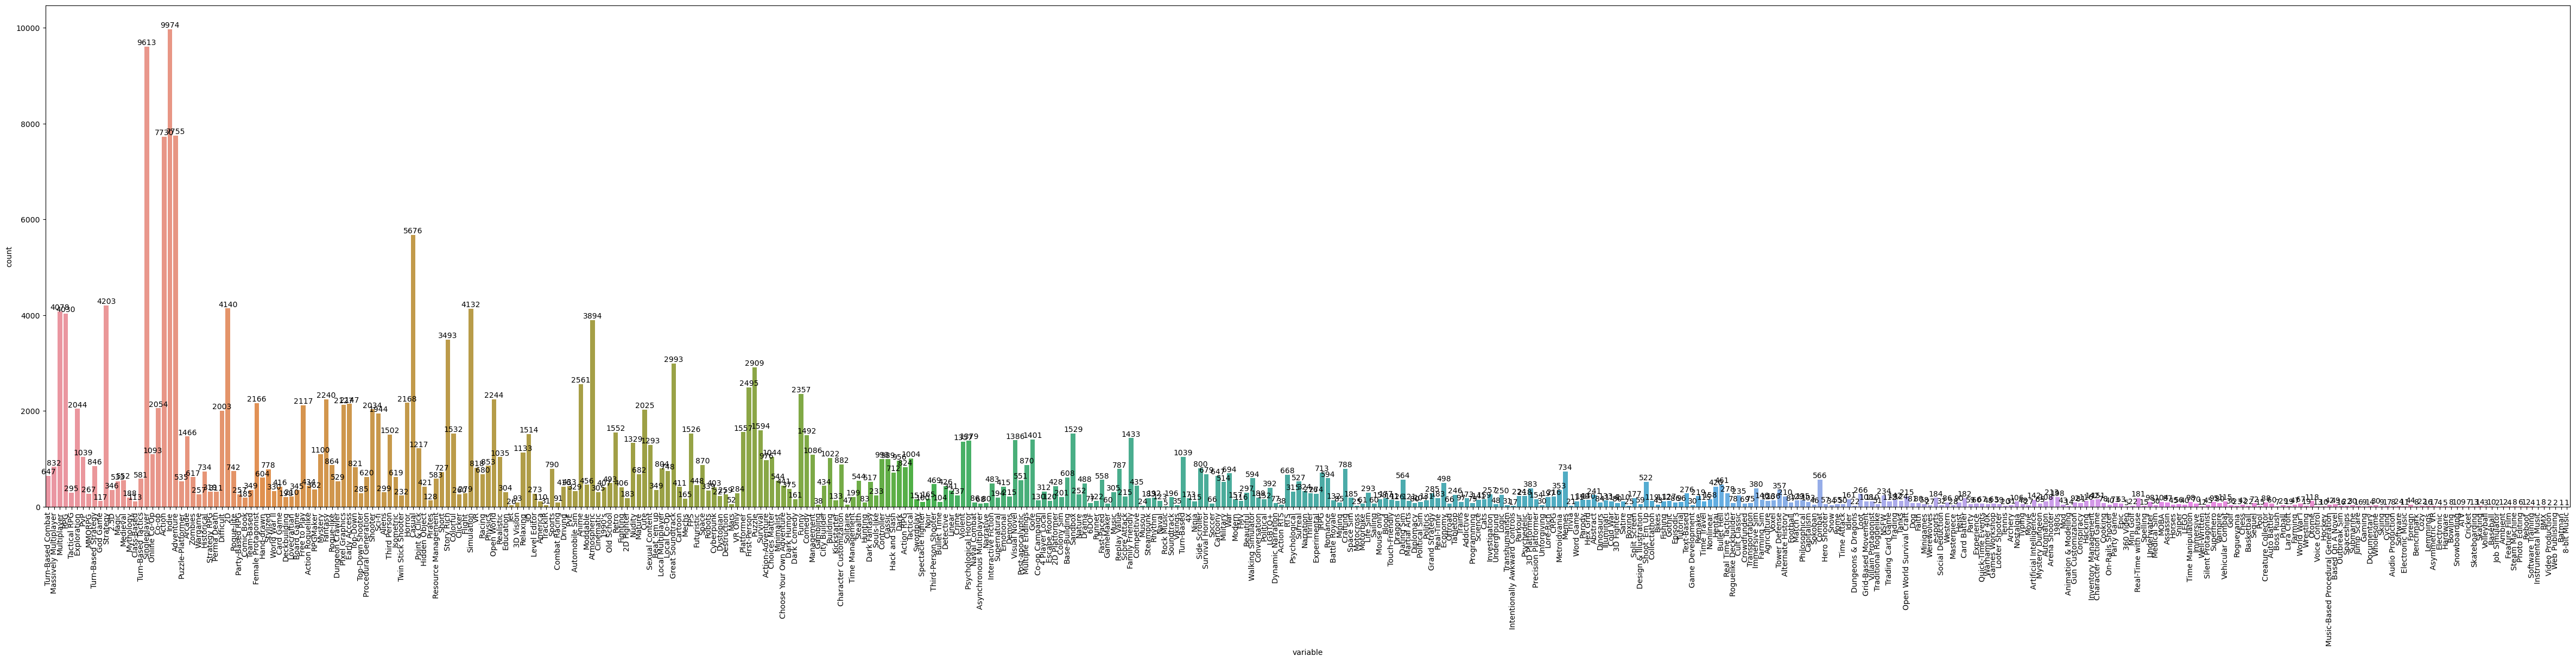

In [23]:
tag_table = tag_price_table.drop(columns =['Price', 'AppID', "Name"])

tag2 = tag_table.melt(value_vars=tag_table.columns)
tag2 = tag2[tag2["value"] != False]
f = plt.figure(figsize=(60, 12))

graph = sb.countplot(data=tag2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()


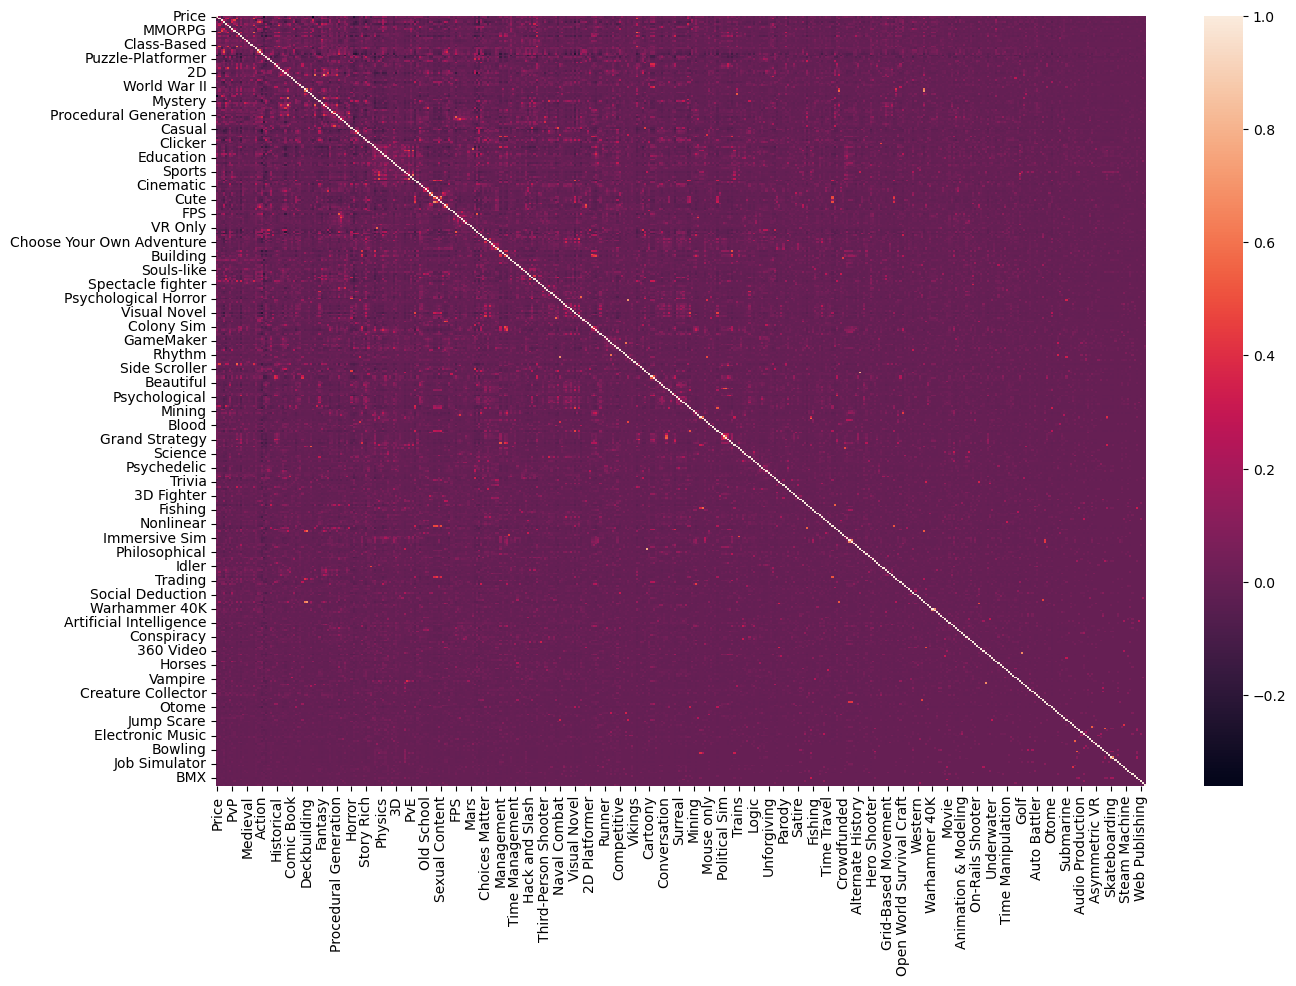

In [24]:
tag_price = tag_price_table.drop(columns =['AppID'])

plt.figure(figsize=(15,10))
sb.heatmap(data=tag_price.corr())
plt.show()

In [25]:
corr_table = tag_price.corr()["Price"]
corr_table.head()

Price                    1.000000
Turn-Based Combat        0.113931
Massively Multiplayer   -0.115344
Multiplayer              0.090242
RPG                      0.095768
Name: Price, dtype: float64

In [26]:
for index, row in corr_table.items():
    if(row > 0.1 or row < -0.1):
        print(index, " aa ", row)

Price  aa  1.0
Turn-Based Combat  aa  0.11393149306146241
Massively Multiplayer  aa  -0.11534432919572014
Singleplayer  aa  0.19447408340566544
Co-op  aa  0.11160914770168019
Indie  aa  -0.271029834669379
Historical  aa  0.11137250197096882
Free to Play  aa  -0.360036132910057
Fantasy  aa  0.10220657048312515
Third Person  aa  0.1578144944042311
Casual  aa  -0.2358369118365874
Short  aa  -0.10656289966035337
Story Rich  aa  0.16968237961190283
Open World  aa  0.16486596464947087
Realistic  aa  0.12588338763157517
3D  aa  0.11177819251834127
Great Soundtrack  aa  0.10127971702269396
Puzzle  aa  -0.10366613582000958
Management  aa  0.10593700495702706
Character Customization  aa  0.12653274401945286
Hack and Slash  aa  0.1268391725031973
Action RPG  aa  0.11366318069197605
Sandbox  aa  0.11106876390941225
Musou  aa  0.11570658399804594
JRPG  aa  0.1639577197935575
Grand Strategy  aa  0.10819962881818643


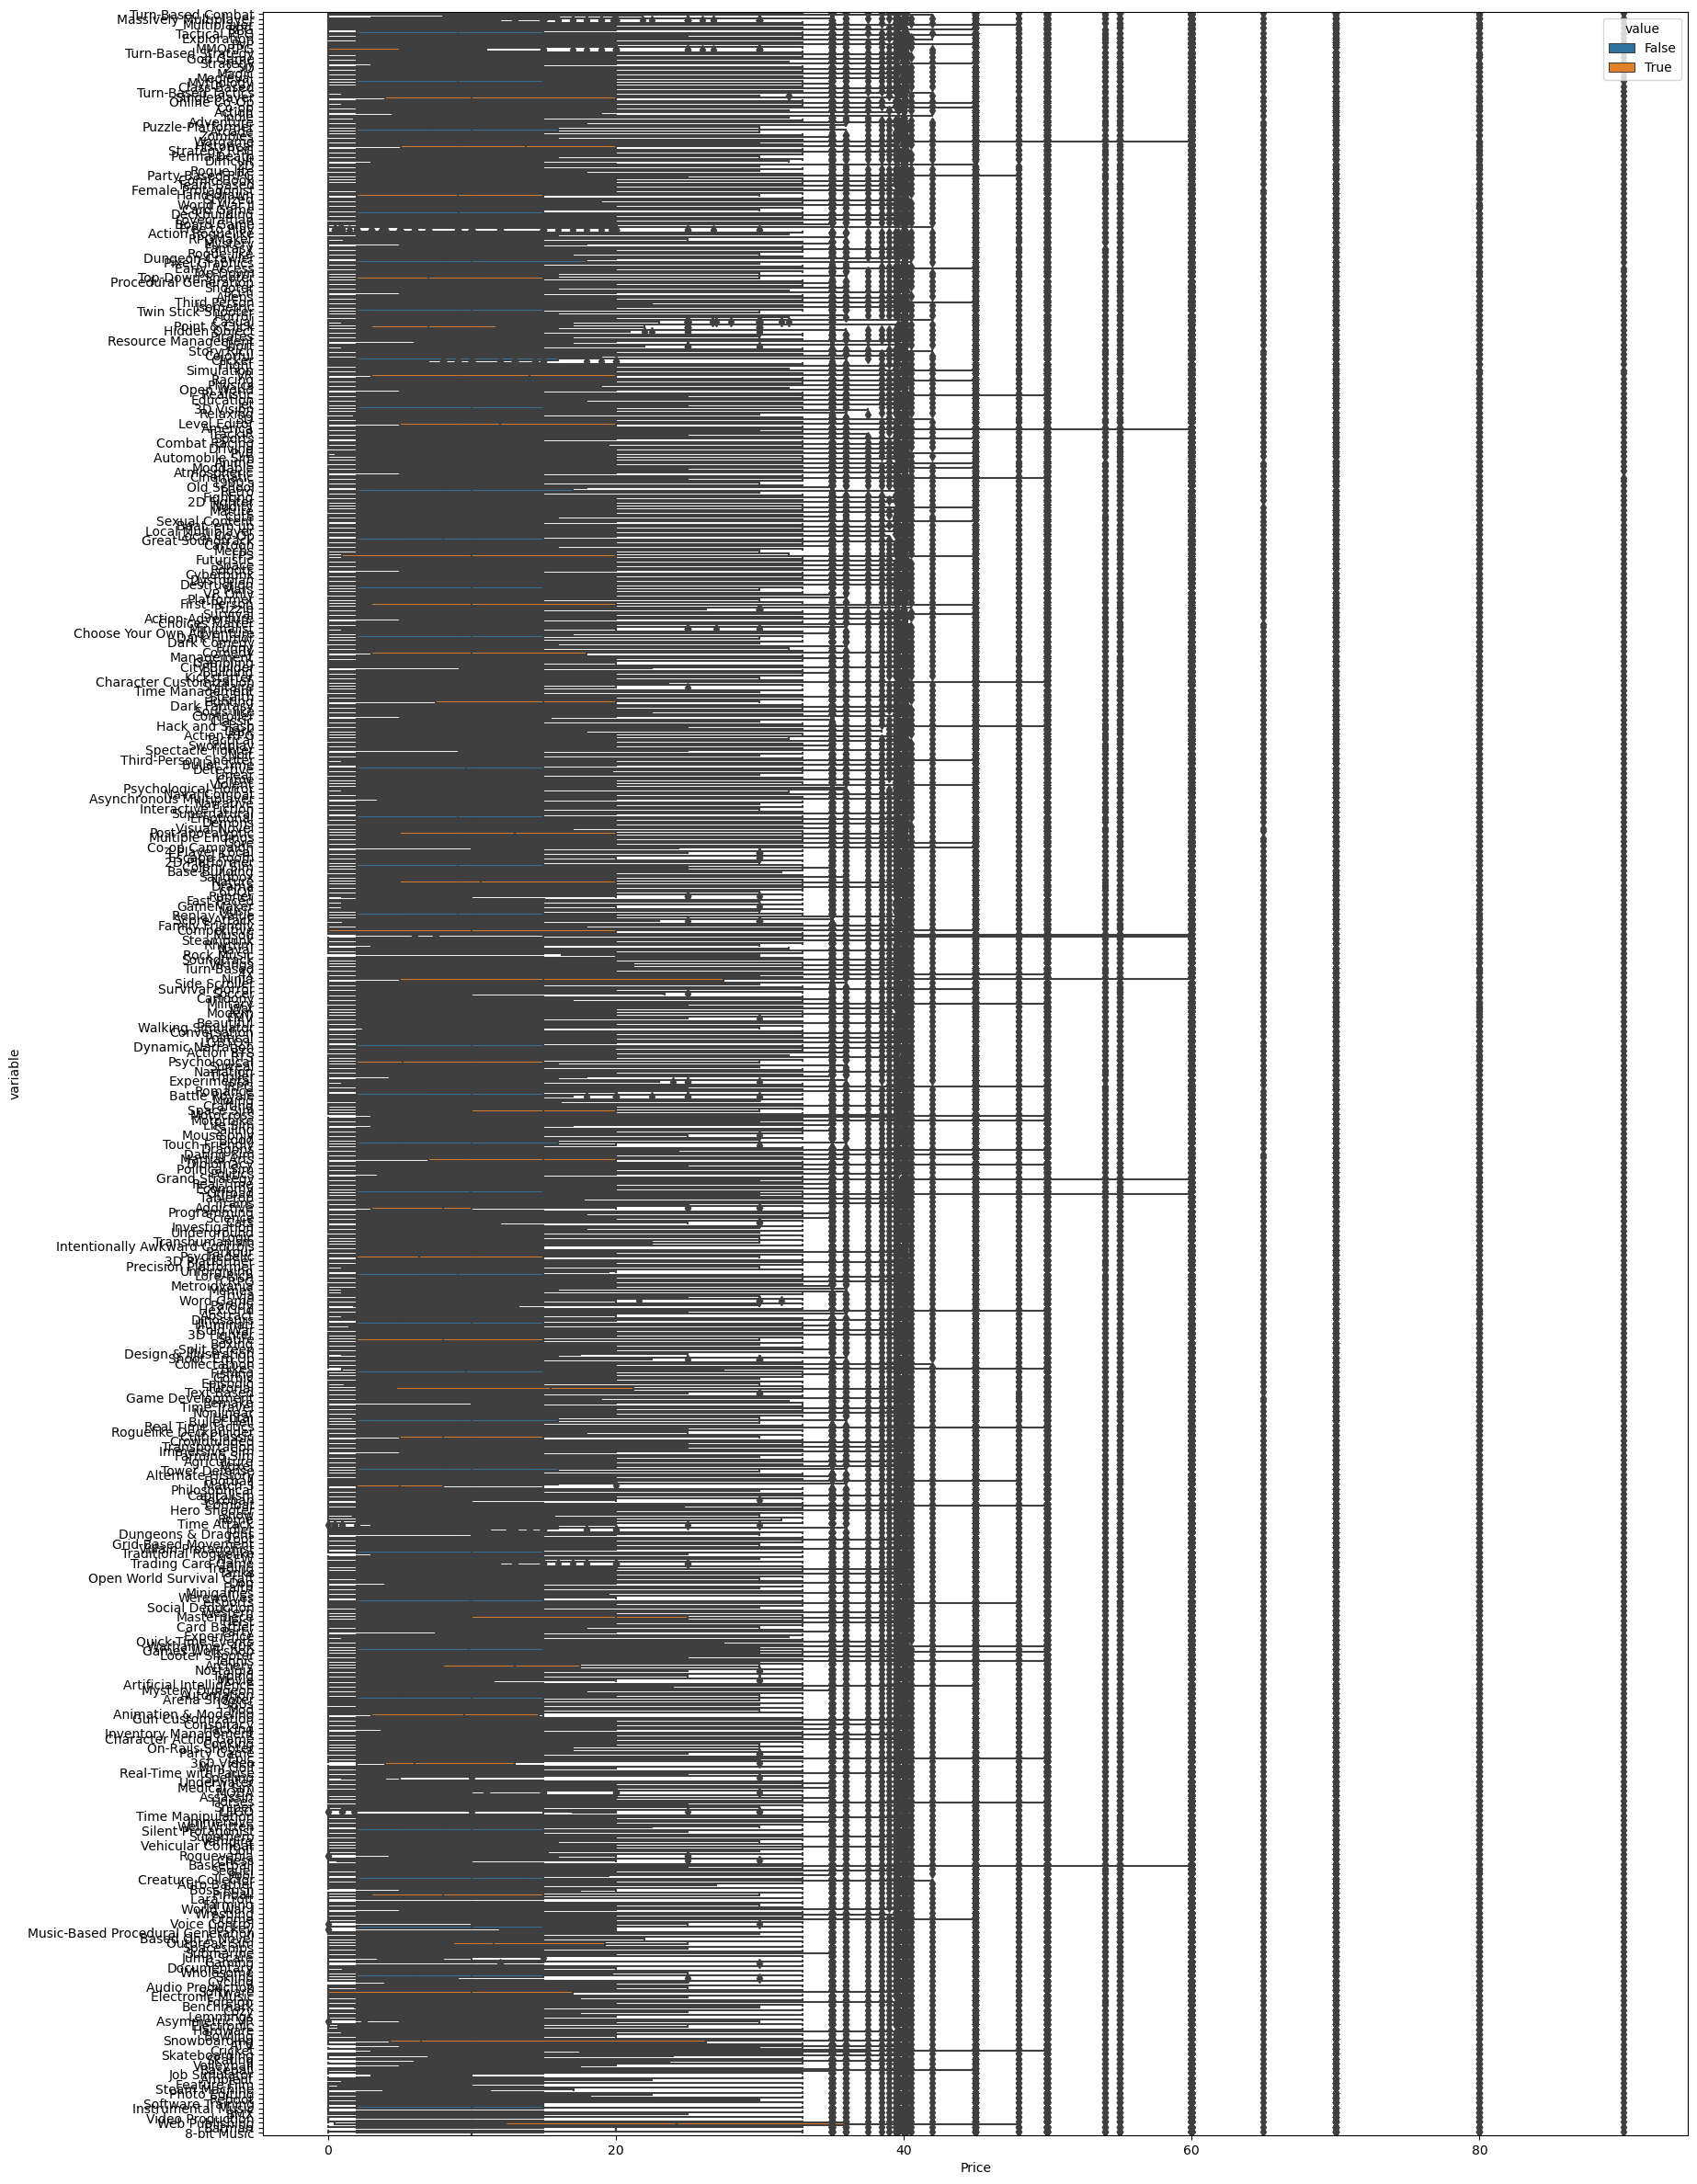

In [27]:
tag_table_melted = pd.melt(tag_price_table, id_vars=['Price'], value_vars=tag_table.columns)

plt.figure(figsize=(20,30))
sb.boxplot(x=tag_table_melted["Price"], y=tag_table_melted["variable"], hue=tag_table_melted["value"], orient="h")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [29]:
json_table = []
tag_price_json = tagg_price.to_json(orient='records')
tag_price_json = json.loads(tag_price_json)

for j in tag_price_json:
    test = {}
    tags = j["Tags"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if tags != None:
        tags = tags.split(",")
        for i in tags:
            test[i] = 1
    
    json_table.append(test)

new_table = pd.DataFrame(json_table)
new_table.fillna(value=0, inplace=True)

new_table.head()

,AppID,Name,Price,Turn-Based Combat,Massively Multiplayer,Multiplayer,RPG,Tactical RPG,Exploration,PvP,...,Steam Machine,Photo Editing,Reboot,Software Training,Instrumental Music,BMX,Video Production,Web Publishing,Batman,8-bit Music
0,1469160,Wartune Reborn,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,320150,Deadlings: Rotten Edition,3.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1026420,WARSAW,23.99,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,485000,Cthulhu Realms,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1454010,Diary of Lucie,12.99,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
regr = RandomForestRegressor()
test_regr = RandomForestRegressor()
columns = new_table.columns.tolist()
columns = columns[3:]
print(columns)
print(len(columns))


['Turn-Based Combat', 'Massively Multiplayer', 'Multiplayer', 'RPG', 'Tactical RPG', 'Exploration', 'PvP', 'MMORPG', 'Turn-Based Strategy', 'God Game', 'Strategy', '2.5D', 'Magic', 'Medieval', 'Mythology', 'Class-Based', 'Turn-Based Tactics', 'Singleplayer', 'Online Co-Op', 'Co-op', 'Action', 'Indie', 'Adventure', 'Puzzle-Platformer', 'Arcade', 'Zombies', 'Wargame', 'Historical', 'Strategy RPG', 'Perma Death', 'Difficult', '2D', 'Rogue-lite', 'Party-Based RPG', 'Comic Book', 'Team-Based', 'Female Protagonist', 'Hand-drawn', 'Stylized', 'World War II', 'Card Game', 'Deckbuilding', 'Lovecraftian', 'Board Game', 'Free to Play', 'Action Roguelike', 'RPGMaker', 'Mystery', 'Fantasy', 'Rogue-like', 'Dungeon Crawler', 'Pixel Graphics', 'Early Access', 'Top-Down', 'Top-Down Shooter', 'Procedural Generation', 'Shooter', 'Sci-fi', 'Aliens', 'Third Person', 'Isometric', 'Twin Stick Shooter', 'Horror', 'Casual', 'Point & Click', 'Hidden Object', 'Pirates', 'Resource Management', 'Short', 'Story Ric

In [31]:
bbb = columns

mmax = 0
mmin = 1000
thing = ""
thing2 = ""
for index, row in corr_table.items():
    if(index == "Price"):
        continue
    if(row > mmax):
        mmax = row
        thing = index
    if(row < mmin):
        mmin = row
        thing2 = index
print("max: ",mmax," min ",mmin)
print(thing, thing2)

max:  0.19447408340566544  min  -0.360036132910057
Singleplayer Free to Play


In [32]:
X = new_table[columns]
Y = new_table["Price"]
test_regr.fit(X, Y)
maybe = test_regr.predict(X)
mse = mean_squared_error(Y, maybe)
score = test_regr.score(X, Y)
print("score: ",score, " mse: ", mse,  mse**(1/2))

score:  0.9199251470212735  mse:  10.577254245506165 3.252269091804392


In [33]:
# ccc = [thing2]
# final = []
# mini = 0
# end = 0
# if(thing2 in bbb):
#     bbb.remove(thing2)
# print(bbb)
# while bbb != []:
#     ccc.append(bbb[0])
#     print(ccc)
#     bbb = bbb[1:]
#     X = a[ccc]
#     Y = a["Price"]
#     regr.fit(X, Y)
#     testt = regr.predict(X)
#     mse = mean_squared_error(Y, testt)
#     score = regr.score(X, Y)
#     if(score >= mini):
#         mini = score
#         final = ccc
#         end = mse
#     else:
#         ccc.pop()
    
#     print("score: ",score, " mse: ", mse,  mse**(1/2))


In [34]:
# print(final)
# print(end**(1/2))
# mini

: 